In [5]:
%load_ext zipline


The zipline extension is already loaded. To reload it, use:
  %reload_ext zipline


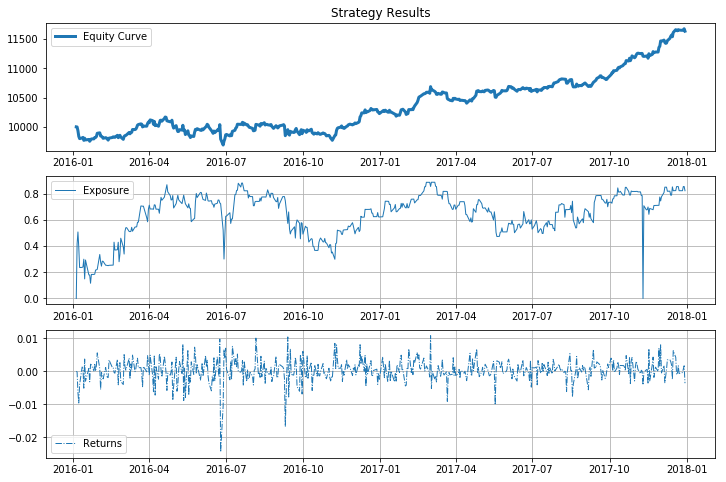

,algo_volatility,algorithm_period_return,alpha,benchmark_period_return,benchmark_volatility,beta,capital_used,ending_cash,ending_exposure,ending_value,...,short_exposure,short_value,shorts_count,sortino,starting_cash,starting_exposure,starting_value,trading_days,transactions,treasury_period_return
2016-01-04 21:00:00+00:00,NaN,0.000000,None,0.0,NaN,None,0.000000,10000.000000,0.000,0.000,...,0.00,0.00,0,NaN,10000.000000,0.000,0.000,1,[],0.0
2016-01-05 21:00:00+00:00,0.002402,-0.000214,None,0.0,0.0,None,-4163.799830,5836.200170,4161.660,4161.660,...,0.00,0.00,0,-11.224972,10000.000000,0.000,0.000,2,"[{'price': 100.95045, 'commission': None, 'sid...",0.0
2016-01-06 21:00:00+00:00,0.058049,-0.006651,None,0.0,0.0,None,-940.205860,4895.994310,5037.500,5037.500,...,0.00,0.00,0,-9.464553,5836.200170,4161.660,4161.660,3,"[{'price': 63.58177500000001, 'commission': No...",0.0
2016-01-07 21:00:00+00:00,0.075428,-0.016196,None,0.0,0.0,None,1120.280715,6016.275025,3821.760,3821.760,...,0.00,0.00,0,-11.156861,4895.994310,5037.500,5037.500,4,"[{'price': 59.820075, 'commission': None, 'sid...",0.0
2016-01-08 21:00:00+00:00,0.065323,-0.020156,None,0.0,0.0,None,1468.981130,7485.256155,2313.180,2313.180,...,0.00,0.00,0,-11.757682,6016.275025,3821.760,3821.760,5,"[{'price': 72.84356, 'commission': None, 'sid'...",0.0
2016-01-11 21:00:00+00:00,0.067965,-0.018882,None,0.0,0.0,None,0.000000,7485.256155,2325.920,2325.920,...,0.00,0.00,0,-10.045340,7485.256155,2313.180,2313.180,6,[],0.0
2016-01-12 21:00:00+00:00,0.066592,-0.018032,None,0.0,0.0,None,-32.403760,7452.852395,2366.830,2366.830,...,0.00,0.00,0,-8.875501,7485.256155,2325.920,2325.920,7,"[{'price': 98.19088, 'commission': None, 'sid'...",0.0
2016-01-13 21:00:00+00:00,0.063253,-0.023048,None,0.0,0.0,None,-609.550620,6843.301775,2926.220,2926.220,...,0.00,0.00,0,-9.822881,7452.852395,2366.830,2366.830,8,"[{'price': 97.06850999999999, 'commission': No...",0.0
2016-01-14 21:00:00+00:00,0.068759,-0.019417,None,0.0,0.0,None,1497.565830,8340.867605,1464.960,1464.960,...,0.00,0.00,0,-7.779412,6843.301775,2926.220,2926.220,9,"[{'price': 98.840555, 'commission': None, 'sid...",0.0
2016-01-15 21:00:00+00:00,0.064958,-0.022350,None,0.0,0.0,None,-1431.921590,6908.946015,2867.550,2867.550,...,0.00,0.00,0,-8.303338,8340.867605,1464.960,1464.960,10,"[{'price': 97.0485, 'commission': None, 'sid':...",0.0


In [11]:


%%zipline --start 2016-1-1 --end 2018-1-1 --capital-base 10000 --bundle quandl --no-benchmark



# This ensures that our graphs will be shown properly in the notebook.
# %matplotlib inline

# Import a few libraries we need
from zipline import run_algorithm

from zipline.api import order_target_percent, record, symbol
from datetime import datetime
import pytz
import matplotlib.pyplot as plt
import pandas as pd

def initialize(context):
    # Which stock to trade
    dji = [
        "AAPL",
        "AXP",
        "BA",
        "CAT",
        "CSCO",
        "CVX",
        "DIS",
        "DWDP",
        "GS",
        "HD",
        "IBM",
        "INTC",
        "JNJ",
        "JPM",
        "KO",
        "MCD",
        "MMM",
        "MRK",
        "MSFT",
        "NKE",
        "PFE",
        "PG",
        "TRV",
        "UNH",
        "UTX",
        "V",
        "VZ",
        "WBA",
        "WMT",
        "XOM",  
    ]
    
    # Make a list of symbols from the list of tickers
    context.dji_symbols = [symbol(s) for s in dji]
    
    # Moving average window
    context.index_average_window = 100
    
def handle_data(context, data):
    # Get history for all the stocks
    stock_hist = data.history(context.dji_symbols, "close", context.index_average_window, "1d")
    
    # Make an empty DataFrame to start with
    stock_analytics = pd.DataFrame()
    
    # Add column for above or below average
    stock_analytics['above_mean'] = stock_hist.iloc[-1] > stock_hist.mean() 
    
    # Set weight for stocks to buy
    stock_analytics.loc[stock_analytics['above_mean'] == True, 'weight'] = 1/len(context.dji_symbols)
    
    # Set weight to zero for the rest
    stock_analytics.loc[stock_analytics['above_mean'] == False, 'weight'] = 0.0
    
    # Iterate each row and place trades
    for stock, analytics in stock_analytics.iterrows():
        # Check if the stock can be traded
        if data.can_trade(stock):
            # Place the trade
            order_target_percent(stock, analytics['weight'])

def analyze(context, perf):
    fig = plt.figure(figsize=(12, 8))
    
    # First chart
    ax = fig.add_subplot(311)
    ax.set_title('Strategy Results')
    ax.plot(perf['portfolio_value'], linestyle='-', 
                label='Equity Curve', linewidth=3.0)
    ax.legend()
    ax.grid(False)
    
    # Second chart
    ax = fig.add_subplot(312)
    ax.plot(perf['gross_leverage'], 
            label='Exposure', linestyle='-', linewidth=1.0)
    ax.legend()
    ax.grid(True)

    # Third chart
    ax = fig.add_subplot(313)
    ax.plot(perf['returns'], label='Returns', linestyle='-.', linewidth=1.0)
    ax.legend()
    ax.grid(True)
    plt.show()

# Set start and end date
# start = pd.Timestamp(datetime(2003, 1, 1, tzinfo=pytz.UTC))
# end = pd.Timestamp(datetime(2017, 12, 31, tzinfo=pytz.UTC))

# Fire off the backtest
#results = run_algorithm(start=start, end=end, 
#                                initialize=initialize, analyze=analyze, 
#                                handle_data=handle_data, 
#                                capital_base=10000, 
#                                data_frequency = 'daily', bundle='quandl' ) 
